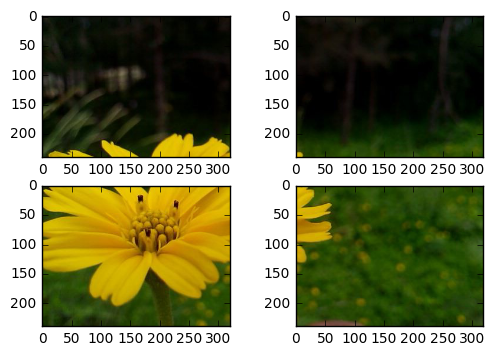

In [10]:
def quarter(filename):
    import matplotlib.image as mpimg
    x = mpimg.imread(filename)
    
    import tensorflow as tf
    image = tf.constant(x, name='x')
    
    with tf.Session() as session:
        session.run(tf.initialize_all_variables())
        
        height, width, depth = session.run(tf.shape(image))
        left_up = tf.slice(image, [0, 0, 0], [height/2, width/2, -1], name='second')
        left_down = tf.slice(image, [height/2, 0, 0], [height-height/2, width/2, -1], name='third')
        right_up = tf.slice(image, [0, width/2, 0], [height/2, width-width/2, -1], name='first')
        right_down = tf.slice(image, [height/2, width/2, 0], [height-height/2, width-width/2, -1], name='fourth')
        
        first = session.run(right_up)
        second = session.run(left_up)
        third = session.run(left_down)
        fourth = session.run(right_down)
        
    import matplotlib.pyplot as plt
    
    plt.subplot(222)
    plt.imshow(first)
    
    plt.subplot(221)
    plt.imshow(second)
    
    plt.subplot(223)
    plt.imshow(third)
    
    plt.subplot(224)
    plt.imshow(fourth)
    
    plt.show()
    
    return (first, second, third, fourth)

quadrant = quarter('flower.jpg')

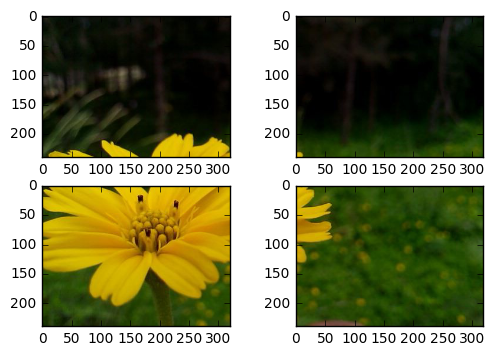

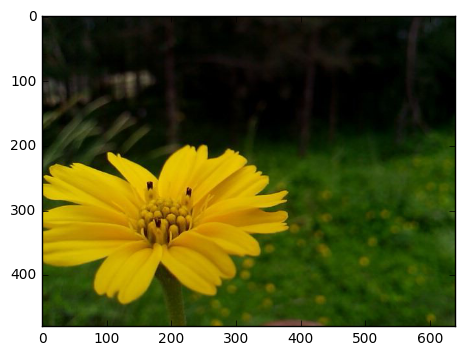

In [9]:
def stitch_quarter(filename):
    first, second, third, fourth = quarter(filename)
    
    import tensorflow as tf
    upper = tf.concat(1, [second, first], name='upper')
    lower = tf.concat(1, [third, fourth], name='lower')
    image = tf.concat(0, [upper, lower], name='image')
    
    with tf.Session() as session:
        session.run(tf.initialize_all_variables())
        result = session.run(image)
        
    import matplotlib.pyplot as plt
    plt.imshow(result)
    plt.show()
    
stitch_quarter('flower.jpg')

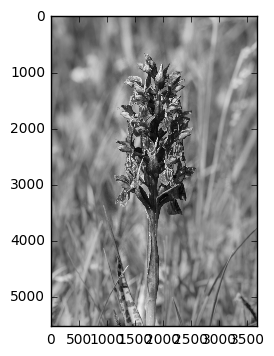

In [33]:
def rgb2gray(filename):
    import matplotlib.image as mpimg
    x = mpimg.imread(filename)
    
    import tensorflow as tf
    image = tf.constant(x, name='x')
    
    with tf.Session() as session:
        session.run(tf.initialize_all_variables())
        
        red, green, blue = tf.split(2, 3, image)
        
        red = session.run(red)
        green = session.run(green)
        blue = session.run(blue)
    
    import numpy as np
    grey_image = (0.299*red + 0.587*green + 0.114*blue)
    grey_image = grey_image[:,:,0]
        
    import matplotlib.pyplot as plt
    from matplotlib.cm import Greys_r
    plt.imshow(grey_image, cmap=Greys_r)
    plt.show()
    
rgb2gray('MarshOrchid.jpg')